# Getting started with QuTiP

This brief notebook will introduce some basic concepts and data structures in QuTiP.
Consider it a shorter version of their existing introductory notebook!

## Import QuTiP

In this notebook, we will only need QuTiP and a couple of supporting packages

**NB** - I don't like to use `from pkg import *`.
Being explicit avoids collisions with methods/modules from other packages, and you know where stuff came from.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
from qutip import (
    Qobj, basis, coherent, create, destroy, expect,
    fock, fock_dm, mesolve, qeye, sigmax, sigmay,
    sigmaz, thermal_dm, tensor
    )

%matplotlib inline

# set some plot defaults
mpl.rcParams['axes.grid'] = True
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16

# stole colors from scQubits
mpl.rcParams["axes.prop_cycle"] = cycler(
    color=[
        "#016E82",
        "#333795",
        "#2E5EAC",
        "#4498D3",
        "#CD85B9",
        "#45C3D1",
        "#AA1D3F",
        "#F47752",
        "#19B35A",
        "#EDE83B",
        "#ABD379",
        "#F9E6BE",
    ]
)

# Quantum objects

We can create a new quantum object using the Qobj class constructor

In [2]:
q = Qobj([[1], [0]])

q

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]

Here we passed python list as an argument to the class constructor. The data in this list is used to construct the matrix representation of the quantum objects.

From the printed description of the state, we see it has a few (there are many more!) attributes that we can access:

In [3]:
print(f"`q` dimensions: {q.dims}")
print(f"`q` shape: {q.shape}")
print(f"Is `q` hermitian? {q.isherm}")
print(f"is `q` a bra or ket? {q.type}")

`q` dimensions: [[2], [1]]
`q` shape: (2, 1)
Is `q` hermitian? False
is `q` a bra or ket? ket


We can also create Pauli operators explicitly using `Qobj`:

In [4]:
sz = Qobj([[1,0], [0,-1]])  # the sigma-z Pauli operator

sz

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

# States and operators

Normally we do not need to create Qobj instances from stratch, using its constructor and passing its matrix represantation as argument.

Instead we can use functions in QuTiP that generates common states and operators for us. Here are some examples of built-in state functions:

## Fock

In [5]:
N = 4 # number of states in the Hilbert space
n = 2 # the state that will be occupied

basis(N, n)

Quantum object: dims=[[4], [1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]

equivalently,

In [6]:
fock(N, n)

Quantum object: dims=[[4], [1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]

## Coherent

Generate a coherent state in the Fock basis

In [7]:
coherent(N=8, alpha=1)

Quantum object: dims=[[8], [1]], shape=(8, 1), type='ket', dtype=Dense
Qobj data =
[[0.60653066]
 [0.60653068]
 [0.4288817 ]
 [0.247617  ]
 [0.12379568]
 [0.05542986]
 [0.02233779]
 [0.00951754]]

There are other accesible states in `QuTiP`, such as `bell_state`, `thermal`, `ghz_state`

As well as the very relevant `phase_basis`

## Density matrices

It is very easy to generate density matrices for states in a particular basis

In [8]:
# a fock state as density matrix

fock_dm(8, 3)  # 8 = hilbert space size, 3 = state that is occupied

Quantum object: dims=[[8], [8]], shape=(8, 8), type='oper', dtype=Dia, isherm=True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]

In [9]:
# thermal state

n = 2  # average number of thermal photons
thermal_dm(7, n)

Quantum object: dims=[[7], [7]], shape=(7, 7), type='oper', dtype=Dia, isherm=True
Qobj data =
[[0.35405537 0.         0.         0.         0.         0.
  0.        ]
 [0.         0.23603691 0.         0.         0.         0.
  0.        ]
 [0.         0.         0.15735794 0.         0.         0.
  0.        ]
 [0.         0.         0.         0.10490529 0.         0.
  0.        ]
 [0.         0.         0.         0.         0.06993686 0.
  0.        ]
 [0.         0.         0.         0.         0.         0.04662458
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.03108305]]

## Operators

### Qubit (two-level-system) operators

In [10]:
# Qubit (two-level system) operators

# Pauli sigma x
print(sigmax())

# Pauli sigma y
print(sigmay())

# Pauli sigma z
print(sigmaz())

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 1.]
 [1. 0.]]
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]


### Harmonic oscillator operators

In [11]:
# annihilation operator
a = destroy(N=4) # N = number of fock states included in the Hilbert space
print(a)

# creation operator
a_dag = create(N=4) # This is equivalent to a.dag()
print(a_dag)
print(a.dag())

Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dia, isherm=False
Qobj data =
[[0.         1.         0.         0.        ]
 [0.         0.         1.41421356 0.        ]
 [0.         0.         0.         1.73205081]
 [0.         0.         0.         0.        ]]
Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dia, isherm=False
Qobj data =
[[0.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.         1.41421356 0.         0.        ]
 [0.         0.         1.73205081 0.        ]]
Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dia, isherm=False
Qobj data =
[[0.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.         1.41421356 0.         0.        ]
 [0.         0.         1.73205081 0.        ]]


You can combine these to form, e.g. the position operator:

In [12]:
a = destroy(4)
x = a + a.dag()

x

Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dia, isherm=True
Qobj data =
[[0.         1.         0.         0.        ]
 [1.         0.         1.41421356 0.        ]
 [0.         1.41421356 0.         1.73205081]
 [0.         0.         1.73205081 0.        ]]

# Composite systems

To model common scenarios like a 2-qubit gate or the Jaynes-Cumming hamiltonian, we will need to deal with composite systems.

The `tensor` method in `QuTiP` performs the tensor product to expand the Hilbert space appropriately for the composite system.

Let's take a system of two qubits. To create a Pauli sigma-z operator that acts on the second qubit and leaves the first qubit unaffected (i.e., the operator $I \otimes \sigma_z$), the syntax is


In [2]:
sz2 = tensor(qeye(2), sigmaz()) # qeye(): identity operator

print(sz2)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]


We can check that it has the intended behavior:

In [3]:
N = 2

psi1 = tensor(basis(N, 1), basis(N, 0))  # excited first qubit
psi2 = tensor(basis(N, 0), basis(N, 1))  # excited second qubit

In [4]:
# this should be true, because sz2 should leave psi1 unaffected
print(sz2 * psi1 == psi1)

True


In [5]:
# this should not be true, because sz2 should flip the sign of the excited state of psi2
print(sz2 * psi2 == psi2)

False


# Finding eigenvalues and eigenstates 

### The trusty harmonic oscillator

$H = \omega a^\dagger a$

No tricks here, this is not an enlightening example, but it's just to show the syntax.

In [6]:
a = destroy(10)
omega = 5
H = omega * a.dag() * a

energies = H.eigenenergies()

print(H)
print(energies)

Quantum object: dims=[[10], [10]], shape=(10, 10), type='oper', dtype=Dia, isherm=True
Qobj data =
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  5.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 10.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 15.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 20.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 25.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 30.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 35.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 40.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 45.]]
[ 0.  5. 10. 15. 20. 25. 30. 35. 40. 45.]


We can restrict the number of returned energies with the `eigvals` argument:

In [7]:
energies = H.eigenenergies(eigvals=4)

print(energies)

[ 0.  5. 10. 15.]


The `eigenstates()` method returns both the energies and states of the hamiltonian:

In [8]:
energies, estates = H.eigenstates()
print(energies)
print(estates)

[ 0.  5. 10. 15. 20. 25. 30. 35. 40. 45.]
[Quantum object: dims=[[10], [1]], shape=(10, 1), type='ket', dtype=Dense
 Qobj data =
 [[1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]
 Quantum object: dims=[[10], [1]], shape=(10, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]
 Quantum object: dims=[[10], [1]], shape=(10, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]
 Quantum object: dims=[[10], [1]], shape=(10, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]
 Quantum object: dims=[[10], [1]], shape=(10, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]
 Quantum object: dims=[[10], [1]], shape=(10, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]]
 Quantum o

As expected, they are the Fock basis vectors!

### The Duffing Oscillator

Now let's try a Duffing Oscillator, a harmonic oscillator with a slight anharmonicity built in.

This is commonly used for modeling transmons!

$H = \omega a^\dagger a - \frac{\alpha}{2} a^\dagger a^\dagger a a$

In [ ]:
a = destroy(10)
omega = 5
alpha = 0.2

H = omega * a.dag() * a - alpha/2 * a.dag() * a.dag() * a * a

energies, estates = H.eigenstates()
print(energies)

We can quickly check that the states are not evenly spaced:

In [ ]:
np.diff(energies)

# Time evolution, expectation values, oh my

`QuTiP` uses a master-equation solver, aka `mesolve`, to simulate time dynamics of quantum systems.

You can add dephasing and decohence operators to it for a true open system simulation. If you don't, it will fall back to unitary evolution.

## First: simple unitary dynamics

Let's copy the original docs and evolve a 2-level system under $H = \sigma_x$ with initial state $|1\rangle$

In [13]:
# Hamiltonian
H = sigmax()

# initial state
psi0 = basis(2, 0)

# list of times for which the solver should store the state vector
tlist = np.linspace(0, 10, 100)

result = mesolve(H, psi0, tlist, c_ops=[], e_ops=[])

I explicitly showed the args `c_ops` and `e_ops`, which are optional (default is `None`).

These are, respectively, the collapse operators to use and the operators for which we want to compute expectation values. Even if you only want to pass one, it must be a list.

In [14]:
result

<Result
  Solver: sesolve
  Solver stats:
    method: 'scipy zvode adams'
    init time: 0.00037980079650878906
    preparation time: 0.0002601146697998047
    run time: 0.01387786865234375
    solver: 'Schrodinger Evolution'
  Time interval: [0.0, 10.0] (100 steps)
  Number of e_ops: 0
  States saved.
>

You're going to be finding the final state **a lot**:

In [15]:
result.states[-1]

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[-0.83906638+0.j        ]
 [ 0.        +0.54402905j]]

## Second: expectation values

Conveniently, `QuTiP` has a method called `expect()` to calculate these for either input states or density matrices.

In [16]:
expect(sigmaz(), result.states[-1])

0.40806479408005597

You can also calculate it for mulitple states, such as the full time evolution contained within `result`:

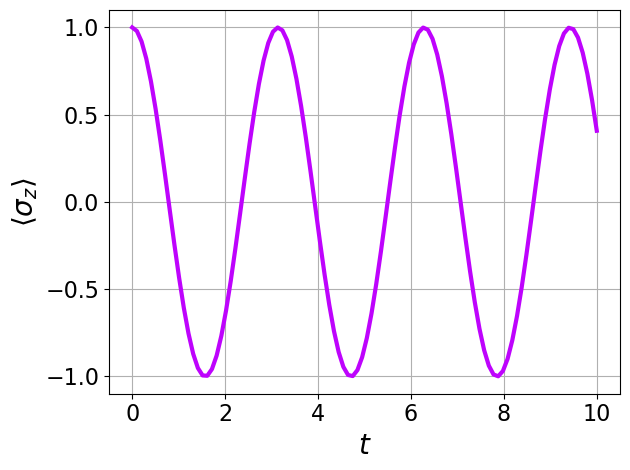

In [17]:
y = expect(sigmaz(), result.states)

fig, ax = plt.subplots(1, 1)
ax.plot(
    tlist,
    expect(sigmaz(), result.states),
    color="xkcd:bright purple"
)
ax.set_xlabel(r"$t$", fontsize=20)
ax.set_ylabel(r"$\langle\sigma_z\rangle$", fontsize=20)
plt.tight_layout()

We can simultaneously calculate multiple expectation values:

/Users/jiatongyang/opt/anaconda3/envs/qutip-env/lib/python3.13/site-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


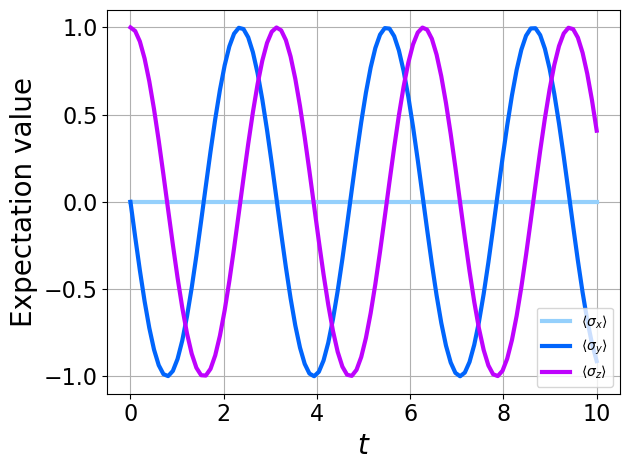

In [18]:
result = mesolve(H, psi0, tlist, [], [sigmax(), sigmay(), sigmaz()])

fig, ax = plt.subplots(1, 1)
labels = [r"$\langle\sigma_x\rangle$", r"$\langle\sigma_y\rangle$", r"$\langle\sigma_z\rangle$"]
colors = ["xkcd:light blue", "xkcd:bright blue", "xkcd:bright purple"]
for i, evals in enumerate(result.expect):
    ax.plot(
        tlist,
        evals,
        label=labels[i],
        color=colors[i]
    )
ax.legend()
ax.set_xlabel(r"$t$", fontsize=20)
ax.set_ylabel("Expectation value", fontsize=20)
plt.tight_layout()

## Once more, with dissipation

We'll slightly modify the Hamiltonian so that the energy gap is $\Delta$:
$H = \frac{\Delta}{2} \sigma_x$

Now we will add a collapse operator:
$C = \sqrt{\gamma} \sigma_z$

and the dynamics will follow the Lindblad Master Equation:

$\dot\rho (t) = -\frac{i}{\hbar} \left[H(t), \rho(t) \right] + \sum\limits_{n} \frac{1}{2} \left[2 C_n\rho(t)C_n^{\dagger} - \rho(t)C_n^{\dagger}C_n - C_n^{\dagger}C_n\rho(t)  \right]$

In [20]:
# coefficients
delta = 2 * np.pi
g = 0.25  # decay rate - should be much smaller than energy scales in system

# Hamiltonian
H = delta / 2.0 * sigmax()

# list of collapse operators
c_ops = [np.sqrt(g) * sigmaz()]

# initial state
psi0 = basis(2, 0)

# list of times for which the solver should store the state vector
tlist = np.linspace(0, 10, 200)

result = mesolve(H, psi0, tlist, c_ops=c_ops, e_ops=[sigmaz()])

We can compare with the analytic solution:

In [21]:
sz_analytic = np.cos(2 * np.pi * tlist) * np.exp(-tlist * g)

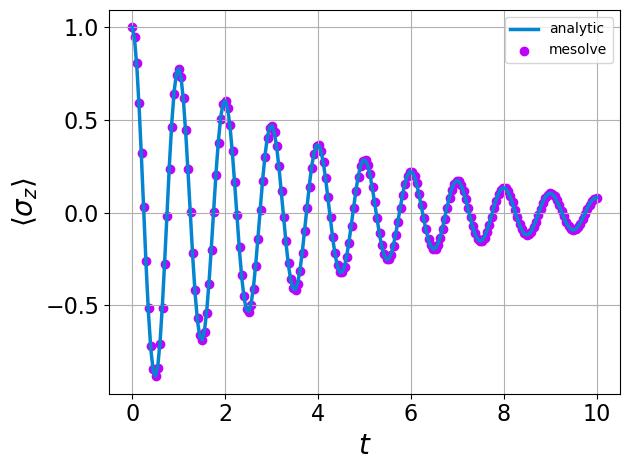

In [22]:
fig, ax = plt.subplots(1, 1)
plt.plot(
    tlist,
    sz_analytic,
    c="xkcd:cerulean",
    linewidth=2.5,
    label="analytic"
)
ax.scatter(
    tlist,
    result.expect[0],
    marker="o",
    label="mesolve",
    color="xkcd:bright purple"
)
plt.legend()
ax.set_xlabel(r"$t$", fontsize=20)
ax.set_ylabel(r"$\langle\sigma_z\rangle$", fontsize=20)
plt.tight_layout()